# 16 LIES, DAMNED LIES, AND STATISTICS

<b>Statistical thinking</b> is a relatively new invention.

This started to change in the middle of the 17th century, most notably with the publication of
<b>John Graunt</b>’s 

* **Natural and Political Observations Made Upon the Bills of Mortality**

Since that time people have used statistics as much to <b>mislead as to inform </b>.

* Some have  <b>willfully </b> used statistics to mislead;

* others have merely been <b>incompetent </b>

We trust that you will use this information only for good,

  * **a better consumer** 
  
  * **a more honest purveyor of statistical information**.

<ol>
<li>Garbage In Garbage Out (GIGO)
<li>Pictures Can Be Deceiving
<li>With this, therefore because of this.
<li>Statistical Measures Don’t Tell the Whole Story
<li>Sampling Bias
<li>Context Matters
<li>Beware of Extrapolation
<li>The Texas Sharpshooter Fallacy
<li>Percentages Can Confuse
<li>Just Beware
</ol>

## 16.1 Garbage In Garbage Out (GIGO)


If the input data is seriously flawed, no amount of statistical massaging will produce a meaningful result.

Calhoun’s (perhaps willfully) spurious response to Adams was based on a classical error, 

<b>the assumption of independence</b>

### Assumption of Independence

The assumption of independence is used for several other statistical tests.

It’s essential to getting results from your <b>sample</b> that reflect what you would find in a <b>population</b>. 

Even the smallest dependence in your data can turn into heavily biased results (which may be undetectable) if you violate this assumption.

A <b>dependence</b> is <b>a connection</b> between your data. For example, how much you earn depends upon how many hours you work. 

<b>Independence</b> means there <b>isn’t a connection</b>. For example, how much you earn isn’t connected to what you ate for breakfast. 

The <b>assumption of independence</b> means that your <b>data isn’t connected in any way</b> (at least, in ways that you haven’t accounted for in your model).

There are actually two assumptions: 
<ul>
<li>The observations between groups should be independent,

    which basically means the groups are made up of different people. You don’t want one person appearing twice in two different groups as it could skew your results.
    
<li>The observations within each group must be independent. 

    If two or more data points in one group are connected in some way, this could also skew your data. For example, let’s say you were taking a snapshot of how many donuts people ate, and you took snapshots every morning at 9,10, and 11 a.m.. You might conclude that office workers eat 25% of their daily calories from donuts. However, you made the mistake of timing the snapshots too closely together in the morning when people were more likely to bring bags of donuts in to share (making them dependent). If you had taken your measurements at 7, noon and 4 p.m., this would probably have made your measurements independent.
</ol>

#### How do I Avoid Violating the Assumption?

Unfortunately, looking at your data and trying to see if you have independence or not is usually difficult or impossible. 

The key to avoiding violating the assumption of independence is to make sure your data is independent while you are collecting it. If you aren’t an expert in your field, this can be challenging.


## 16.2 Pictures Can Be Deceiving

There can be no doubt about the utility of graphics for quickly conveying information. However, when used carelessly (or maliciously) a plot can be highly misleading.

Consider, for example, the following charts depicting housing prices in the U.S. Midwestern states.
<img src="./img/162.PNG"/> 

Looking at the chart on the left, it seems as if housing prices were <b>pretty stable</b> from 2006-2009.

But wait a minute, wasn’t there <b>a collapse of U.S. residential real estate</b> followed by a global financial crisis in late 2008? There was indeed, as shown in <b>the chart on the right</b>.

The first chart was <b>designed to give the impression</b> that housing prices had been <b>stable</b>.

On the y-axis, the designer used <b>a logarithmic scale</b> ranging from the absurdly low average price for a house of <b>10,000</b> to the improbably high average price of <b>1 million</b>. This <b>minimized the amount of space</b> devoted to the area where prices are changing, giving the impression that the changes were relatively small.

The chart above and on the right was <b>designed to give the impression</b> that housing prices <b>moved erratically, and then crashed</b>.

The designer used <b>a linear scale and a narrow range of prices</b>, so the sizes of the changes were <b>exaggerated</b>.

The code in Figure 16.1 produces the two plots we looked at above and <b>a plot intended to give an accurate impression of the movement of housing prices</b>

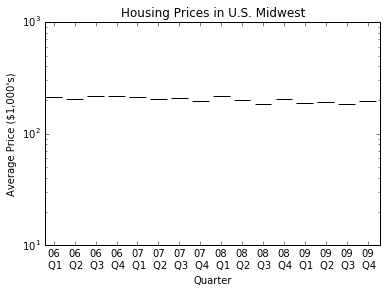

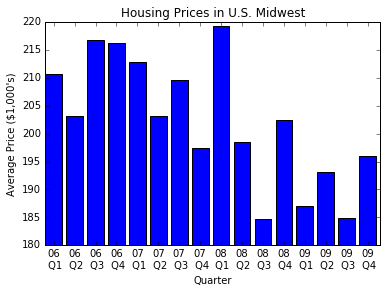

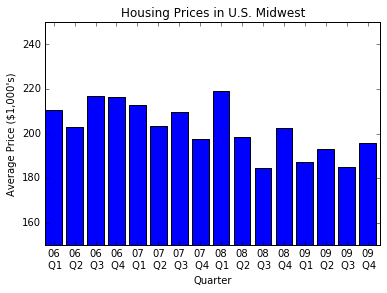

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 

def midWestHousingPrices():
    f = open('./src/midWestHousingPrices.txt', 'r')
    
    #Each line of file contains year quarter price
    #for Midwest region of U.S.
    
    labels, prices = ([], [])
    for line in f:
        year, quarter, price = line.split()
        
        label = year[2:4] + '\n Q' + quarter[1]
        labels.append(label)
        prices.append(float(price)/1000)
    
    f.close()
    
    return labels, prices

def plotHousing(impression):
    """Assumes impression a str.  Must be one of 
         'flat','volatile,' and 'fair'
       Produce bar chart of housing prices over time"""
    quarters =np.arange(len(labels)) # x coords of bars
    width = 0.8 #Width of bars
    
    plt.figure()
    
    if impression == 'flat':
        plt.semilogy()
        
    plt.bar(quarters, prices, width)
    plt.xticks(quarters+width/2.0, labels)
    plt.title('Housing Prices in U.S. Midwest')
    plt.xlabel('Quarter')
    plt.ylabel('Average Price ($1,000\'s)')
    
    if impression == 'flat':
        plt.ylim(10, 10**3)
    elif impression == 'volatile':
        plt.ylim(180, 220)
    elif impression == 'fair':
        plt.ylim(150, 250)
    else:
        raise ValueError

labels, prices = ([], [])
labels, prices=midWestHousingPrices()

plotHousing('flat')
plotHousing('volatile')
plotHousing('fair')
plt.show()


It uses two plotting facilities that we have not yet seen. 

`plt.bar(quarters, prices, width)` 

produces a bar chart with `width` wide bars. The left edges of the bars are the values of the elements of quarters and
the heights of the bars are the values of the corresponding elements of prices.


`plt.xticks(quarters+width/2.0, labels)` 

describes the labels associated with the bars. 

The first argument: quarters+width/2.0:  specifies where each label is to be placed 

the second argument:labels : the text of the labels. 

The function `yticks` behaves analogously.

### 16.3 Cum Hoc Ergo Propter Hoc

Statisticians, like attorneys and physicians, sometimes use Latin for no obvious reason
other than to seem erudite. This phrase means, “with this, therefore because of this.”

When two things are <b>correlated</b>, there is a temptation to assume that one has <b>caused</b> the other.

#### But Correlation does not imply causation!

there is some <b>lurking variable</b> that we have not considered that causes each.

Given enough retrospective data, it is <b>always possible to find two variables that are correlated </b>
<img src="./img/163.PNG"/>

When such correlations are found, the first thing to do is to <b>ask whether there is a plausible theory explaining the
correlation</b>.

Falling prey to the `cum hoc ergo propter hoc` fallacy can be <b>quite dangerous</b>.





## 16.4 Statistical Measures Don’t Tell the Whole Story

There are an enormous number of different statistics that can be extracted from a data set.

By carefully choosing among these, it is possible to convey <b>a variety of different impressions about the same data</b>. 

A good antidote is to look at the data set itself.

If possible, always <b>take a look at some representation of the raw data</b>.

In 1973, the statistician F.J. Anscombe published a paper containing the table
below. It contains the <x, y> coordinates of the points in each of four data sets.

|x0 |y0|x1|y2|x2|y2|x3|y3|
| ---- |:------:| :------:| :------:|  :------:| :------:| :------:|  ----:|
|10.0|	8.04 |	10.0|	9.14 |	10.0 	|7.46	|8.0    |6.58|
|8.0| 	6.95 |	8.0 |	8.14 |	8.0     |6.77	|8.0    |5.76|
|13.0| 	7.68 |	13.0|	8.74 |	13.0    |12.74	|8.0    |7.71|
|9.0|	8.81 |	9.0 |	8.77 |	9.0     |7.11	|8.0    |8.84|
|11.0| 	8.33 |	11.0|	9.26|	11.0    |7.81	|8.0    |8.47|
|14.0| 	9.96 |	14.0|	8.10 |	14.0    |8.84	|8.0    |7.04|
|6.0|	7.24 |	6.0 |	6.13 |	6.0     |6.08	|8.0 	|5.25|
|4.0| 	4.26 |	4.0 |	3.10| 	4.0     |5.39	|19.0 	|12.5|
|12.0|	10.84| 	12.0| 	9.13| 	12.0    |8.15	|8.0 	|5.56|
|7.0| 	4.82 | 	7.0 |	7.26| 	7.0     |6.42	|8.0 	|7.91|
|5.0| 	5.68 | 	5.0 | 	4.74| 	5.0     |5.73	|8.0 	|6.89|




#### Calculating Pearson correlation  in Python

$r=\frac{\sum_{i=1}^n (X_i- \overline X)(Y_i- \overline Y)}{ \sqrt{ \sum_{i=1}^n (X_i- \overline X)^2} \cdot \sqrt{ \sum_{i=1}^n (Y_i- \overline Y)^2}  }$



In [11]:
import math

def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_r(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

x0=[10.0, 8.0,13.0, 9.0,11.0,
    14.0, 6.0, 4.0,12.0, 7.0,5.0]
y0=[8.04,6.95,7.58,8.81,8.33,
    9.96,7.24,4.26,10.84,4.82,5.68]
r=pearson_r(x0,y0)
print(r)

0.81642051634484


In [12]:
import numpy
numpy.corrcoef(x0,y0)[0, 1]

0.81642051634484003

Does this mean that there is no obvious way to distinguish these data sets from
each other? No, one simply needs to plot the data to see that the data sets are
not at all alike.
<img src="./img/164curve.PNG"/> 


## 16.5 Sampling Bias

#### * non-response bia

During World War II, whenever an Allied plane would return from a mission over Europe the plane would be inspected to see where the flak had impacted. Based upon this data, mechanics reinforced those areas of the planes that seemed most likely to be hit by flak.

What’s wrong with this? They did not inspect the planes that failed to return from missions because they had been downed by flak. Perhaps these unexamined planes failed to return precisely because they were hit in the places
where the flak would do the most damage. 

This particular error is called <b>non-response bias</b>.

#### * sampling a subset of a population we can infer things about the population as a whole?

All statistical techniques are based upon the assumption that by sampling a subset of a population we can infer things about the population as a whole.

Unfortunately, many studies, particularly in the social sciences, are based on what has been called <b>convenience (or accidental) sampling</b>.


A convenience sample <b>might be</b> representative, but there is no way of knowing <b>whether it actually</b> is
representative.

The Family Research Institute’s Web site contains a table with the following information:
<img src="./img/165.PNG"/>
Pretty scary stuff if your sexual preference is other than heterosexual—until one  looks at how the data was compiled.

How does one go about evaluating such a sample? 

One technique is to <b>compare data compiled from the sample against data compiled elsewhere</b>


## 16.6 Context Matters

It is easy to read more into the data than it actually implies, especially when viewing the data <b>out of context</b>.

Opponents of government initiatives to reduce the prevalence of guns in the U.S. are fond of quoting the statistic that roughly <b>99.8%</b> of the firearms in the U.S. will not be used to commit a violent crime in any given year. 

Does this mean that there is <b>not much gun violence in the U.S</b>? 

### NO!

The National Rifle Association reports that that there are roughly 300 million privately owned firearms in the
U.S.—<b>0.2%</b> of 300 million is <b>600,000</b>.

## 16.7 Beware of Extrapolation

It is all too easy to extrapolate from data.

Extrapolation should be done <b>only</b> when one has <b>a sound theoretical justification</b> for doing so.

## 16.8 The Texas Sharpshooter Fallacy

Imagine that you are driving down a country road in Texas. You see a barn that has six targets painted on it, and a bullet hole at the very center of each target.

“Yes sir,” says the owner of the barn,“I never miss.” “That’s right,” says his spouse, “there ain’t a man in the state of Texas who’s more accurate with a paint brush.”

Got it? <b>He fired the six shots, and then painted the targets around them</b>.

A classic of the genre appeared in 2001.108 It reported that a research team at the Royal Cornhill hospital in Aberdeen had discovered that “anorexic women are most likely to have been born in the spring or early summer… Between March and June there were 13% more anorexics born than average, and 30% more in June itself.”

#### Let’s look at that worrisome statistic for those women born in June.

Let’s write a short program to see if we can reject the null hypothesis that this occurred purely by chance.


In [9]:
import random

#Page 231, Figure 16.2
def juneProb(numTrials):
    june48 = 0
    for trial in range(numTrials):
        june = 0
        for i in range(446):
            if random.randint(1,12) == 6:
                june += 1
        if june >= 48:
            june48 += 1
    jProb = june48/float(numTrials)
    print('Probability of at least 48 births in June =', jProb)


In [10]:
juneProb(10000)

Probability of at least 48 births in June = 0.0433


It looks as if the probability of at least 48 babies being born in June purely by chance is around 4.5%.

Well, they might have been on to something had they started with the hypothesis that more babies who will become anorexic are born in June, and then run a study designed to check that hypothesis.

#### But that is not what they did. 
Instead, they looked at the data and then, imitating the Texas sharpshooter, drew a circle around June.

The right statistical question to have asked is what is <b>the probability</b> that there was <b>at least one month</b> (out of 12) in which at least 48 babies were born.



In [ ]:
#Page 231, Figure 16.3
def anyProb(numTrials):
    anyMonth48 = 0
    for trial in range(numTrials):
        months = [0]*12
        for i in range(446):
            months[random.randint(0,11)] += 1
        if max(months) >= 48:
            anyMonth48 += 1
    aProb = anyMonth48/float(numTrials)
    print('Probability of at least 48 births in some month =', aProb)


In [ ]:
anyProb(10000)

It appears that it is not so unlikely after all that the results reported in the study reflect <b>a chance occurrence</b> rather <b>a real association between birth month and anorexia</b>.

One doesn’t have to come from Texas to fall victim to the Texas Sharpshooter Fallacy.

What next steps might the Aberdeen group have taken to test their newfound hypothesis?

One possibility is to conduct <b>a prospective study</b>. In a prospective study, one starts with a set of hypotheses and then gathers data with the potential to either refute or confirm the hypothesis. If the group conducted a new study and got similar results, one might be convinced. Prospective studies can be expensive and time consuming to perform.

Prospective studies can be expensive and time consuming to perform.

In <b>a retrospective study</b>, one has to examine existing data in ways that reduce the likelihood of getting misleading results. One common technique, as discussed in Chapter 15, is to split the data into <b>a training set</b> and <b>a holdout set</b>.

## 16.9 Percentages Can Confuse

When thinking about percentages, we always need to pay attention to the basis on which the percentage is computed.

Percentages can be particularly misleading when applied to a small basis

## 16.10 Just Beware

It would be easy, and fun, to fill a few hundred pages with a history of statistical abuses. 

But by now you probably got the message: 

# It’s just as easy to lie with numbers as it is to lie with words.

Make sure that you understand what is actually being measured and how those “statistically significant” results were
computed before you jump to conclusions.